In [66]:
import os
import glob as glob
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)

In [67]:
files = glob.glob("data/*.csv")
len(files)

51

In [68]:
fname = files[0]
fname

'data/Hourly_Napier_Aerodrome_NZNRA_39.470S_176.865E_2m_Jan1993_Aug2022.csv'

In [69]:
dname = fname.split()

In [70]:
df = pd.read_csv(fname)
df = df.rename(columns={df.columns[0]: "time"})

In [71]:
df.columns

Index(['time', 'Dir  °T', 'Speed  kt', 'Max Gust Hourly kt', 'Vis', 'Weather',
       'Clouds', 'Temp  °C', 'DewPt  °C', 'RH  %', 'MSL Press  hPa',
       'Rain Hourly mm', 'Radn Hourly MJ/m²'],
      dtype='object')

In [62]:
df.head()

,time,Dir °T,Speed kt,Max Gust Hourly kt,Vis,Weather,Clouds,Temp °C,DewPt °C,RH %,MSL Press hPa,Rain Hourly mm,Radn Hourly MJ/m²
0,01-Jan-1993 12:00,200.0,3.0,10.0,30KM,,FEW080,19.0,NaN,54.0,1014.2,0.0,2.89
1,01-Jan-1993 13:00,80.0,10.0,14.0,30KM,,BKN047,17.0,NaN,67.0,1014.1,0.0,3.08
2,01-Jan-1993 14:00,80.0,7.0,14.0,30KM,,SCT050 BKN060,16.0,NaN,70.0,1013.7,0.0,1.41
3,01-Jan-1993 15:00,70.0,6.0,11.0,30KM,,BKN060,16.0,NaN,69.0,1013.4,0.0,1.33
4,01-Jan-1993 16:00,70.0,6.0,11.0,30KM,,BKN060,16.0,NaN,70.0,1012.8,0.0,1.12


In [63]:
df.columns

Index(['time', 'Dir  °T', 'Speed  kt', 'Max Gust Hourly kt', 'Vis', 'Weather',
       'Clouds', 'Temp  °C', 'DewPt  °C', 'RH  %', 'MSL Press  hPa',
       'Rain Hourly mm', 'Radn Hourly MJ/m²'],
      dtype='object')

In [64]:
renamed_cols = {"time": "time",
                "Dir  °T": "direction_wind", 
                "Speed  kt": "average wind", 
                "Max Gust Hourly kt": "maximum_wind",
                "Rain Hourly mm": "total rainfall",
                "Radn Hourly MJ/m²": "solar radiation", 
                "Temp  °C": "temperature_c"}
df = df.rename(renamed_cols, axis=1)
df.head()

,time,direction_wind,average wind,maximum_wind,Vis,Weather,Clouds,temperature_c,DewPt °C,RH %,MSL Press hPa,total rainfall,solar radiation
0,01-Jan-1993 12:00,200.0,3.0,10.0,30KM,,FEW080,19.0,NaN,54.0,1014.2,0.0,2.89
1,01-Jan-1993 13:00,80.0,10.0,14.0,30KM,,BKN047,17.0,NaN,67.0,1014.1,0.0,3.08
2,01-Jan-1993 14:00,80.0,7.0,14.0,30KM,,SCT050 BKN060,16.0,NaN,70.0,1013.7,0.0,1.41
3,01-Jan-1993 15:00,70.0,6.0,11.0,30KM,,BKN060,16.0,NaN,69.0,1013.4,0.0,1.33
4,01-Jan-1993 16:00,70.0,6.0,11.0,30KM,,BKN060,16.0,NaN,70.0,1012.8,0.0,1.12


In [65]:
df[list(renamed_cols.values())]

,time,direction_wind,average wind,maximum_wind,total rainfall,solar radiation,temperature_c
0,01-Jan-1993 12:00,200.0,3.0,10.0,0.0,2.89,19.0
1,01-Jan-1993 13:00,80.0,10.0,14.0,0.0,3.08,17.0
2,01-Jan-1993 14:00,80.0,7.0,14.0,0.0,1.41,16.0
3,01-Jan-1993 15:00,70.0,6.0,11.0,0.0,1.33,16.0
4,01-Jan-1993 16:00,70.0,6.0,11.0,0.0,1.12,16.0
...,...,...,...,...,...,...,...
259448,07-Aug-2022 20:00,340.0,5.0,6.0,0.0,0.00,12.0
259449,07-Aug-2022 21:00,110.0,3.0,5.0,0.0,0.00,12.1
259450,07-Aug-2022 22:00,170.0,4.0,5.0,0.0,0.00,12.0
259451,07-Aug-2022 23:00,30.0,6.0,11.0,0.6,0.00,11.9


In [44]:
# 259453
# Dir  °T (use)
# Speed  kt (use)
# Max Gust Hourly kt
# Radn Hourly MJ/m² (use)

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259453 entries, 0 to 259452
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             259453 non-null  object 
 1   direction_wind   251602 non-null  float64
 2   average wind     257683 non-null  float64
 3   maximum_wind     257213 non-null  float64
 4   Vis              257122 non-null  object 
 5   Weather          164987 non-null  object 
 6   Clouds           208095 non-null  object 
 7   temp_c           257657 non-null  float64
 8   DewPt  °C        174366 non-null  float64
 9   RH  %            257071 non-null  float64
 10  MSL Press  hPa   257517 non-null  float64
 11  total rainfall   257439 non-null  float64
 12  solar radiation  257086 non-null  float64
dtypes: float64(9), object(4)
memory usage: 25.7+ MB


In [24]:
# 	Latitude	Longitude
# 1	-43.746	173.122
#
# 	Latitude	Longitude
# 2	-37.671	176.197

# http://router.project-osrm.org/route/v1/driving/{173.122},{-43.746};{176.197},{-37.671}
# http://router.project-osrm.org/route/v1/driving/173.122,-43.746;176.197,-37.671

In [25]:
df[df.temp_c.isna()].shape

(1049, 13)

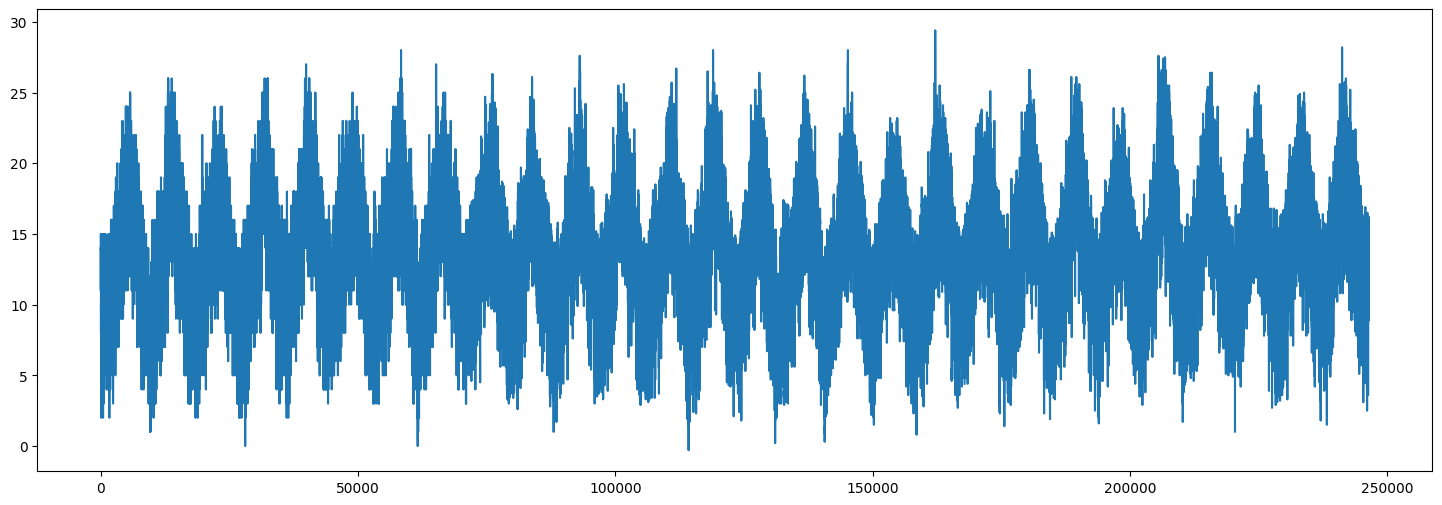

In [26]:
plt.figure(figsize=(18, 6))
plt.plot(df.temp_c.values)
plt.show()